# Clustering K-Means

Suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang  mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain.<br><br>
*Simbol K pada K-means clustering menandakan jumlah kluster yang digunakan.*
<br><br>
**Formula**

$$
J=\sum_{j=1}^k \sum_{i=1}^n\left\|x_i^{(j)}-c_j\right\|^2
$$
Dengan<br>
$J$ = Objective Function <br>
$k$  = Number of Clusters<br>
$n$  = Number of Cases<br>
$x$  = Case *i*<br>
$c$  = Centroid for Cluster *j*<br>
$\left\|x_i^{(j)}-c_j\right\|^2$ = Dintance Function

**Step**
1. Mengelompokkan data ke dalam k grup di mana k telah ditentukan sebelumnya.
2. Pilih k titik secara acak sebagai pusat cluster.
3. Menghitung jarak masing-masing data ke pusat cluster kemudian memasukan data tersebut ke cluster tertentu jika memiliki jarak terdekat (jarak yang nilainya rendah)
4. Menentukan pusat cluster baru dengan menghitung rata-rata dari anggota cluster
5. Ulangi langkah 3 hingga tidak ada data yang berpindah tempat.

In [15]:
#Import Modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [16]:
#Menampilkan Dataset
url = "https://raw.githubusercontent.com/alisaSugiarti/datamining/main/IRIS.csv"
#colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
air = pd.read_csv(url)
air.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


>Menentukan fitur yang akan dikelompokkan. Fitur yang akan digunakan antara lain SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.

In [17]:
air_x = air.iloc[:, 0:4]
air_x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


> Selanjutnya mengubah dataframe ke dalam bentuk Array

In [18]:
x_array = np.array(air_x)
print(x_array)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

> Lakukan normalisasi data menggunakan metode Min Max Scaler. Normalisasi data digunakan untuk memperkecil jarak antar sehingga memudahkan dalam proses perhitungan.

In [19]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled
dataframe= pd.DataFrame(x_scaled, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']) 
print (dataframe)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0.222222      0.625000       0.067797      0.041667
1         0.166667      0.416667       0.067797      0.041667
2         0.111111      0.500000       0.050847      0.041667
3         0.083333      0.458333       0.084746      0.041667
4         0.194444      0.666667       0.067797      0.041667
..             ...           ...            ...           ...
145       0.666667      0.416667       0.711864      0.916667
146       0.555556      0.208333       0.677966      0.750000
147       0.611111      0.416667       0.711864      0.791667
148       0.527778      0.583333       0.745763      0.916667
149       0.444444      0.416667       0.694915      0.708333

[150 rows x 4 columns]


> Tentukan dan Konfigurasikan fungsi K-Means dengan mengelompokkan data menjadi 3 cluster

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)

In [21]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [22]:
KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=3, random_state=0)

>Menentukan Nilai Centroid

In [23]:
print(kmeans.cluster_centers_)

[[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.44125683 0.30737705 0.57571548 0.54918033]
 [0.70726496 0.4508547  0.79704476 0.82478632]]


>Menambahkan kolom Cluster pada dataframe

In [24]:
air["kluster"] = kmeans.labels_

>**Visualisasi hasil clustering**

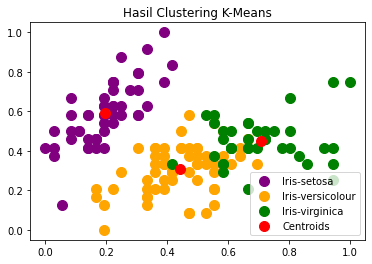

In [25]:
#Opsi 1
#Visualising the clusters
plt.title("Hasil Clustering K-Means")
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

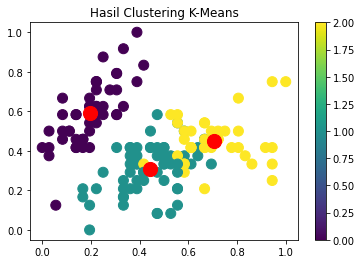

In [26]:
#Opsi 2
#Visualising the clusters
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = air.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=1 , marker="o");
plt.title("Hasil Clustering K-Means")
plt.colorbar (output)
plt.show()

**Kesimpulan**
>Dari seluruh hasil percobaan tes split yang telah dilakukan, diperoleh hasil split terbaik yaitu split 3 yang memberikan keuntungan informasi sebesar 0.0005490214732508658. Hasil tes split 3 memiliki nilai split yang terendah.